In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rta-dataset/RTA Dataset.csv


## Libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import missingno as mssno
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from imblearn.over_sampling import SMOTE,SMOTENC
from sklearn.metrics import accuracy_score,classification_report,f1_score

from sklearn.feature_selection import mutual_info_classif,SelectKBest,chi2
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

In [4]:
df=pd.read_csv("/kaggle/input/rta-dataset/RTA Dataset.csv")

# 1. Exploratory Data Analysis


In [5]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [6]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [7]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
1015,20:39:00,Saturday,31-50,Male,Above high school,Owner,1-2yr,Automobile,Owner,1-2yr,...,Turnover,Pedestrian,Female,Under 18,2,Driver,Normal,"In carriageway, statioNot a Pedestrianry - not...",Driving at high speed,Slight Injury
1368,18:09:00,Monday,18-30,Male,Junior high school,Employee,NaN,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,Over 51,3,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
10940,17:10:00,Friday,Under 18,Male,Elementary school,Employee,Below 1yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Self-employed,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
989,12:05:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (41?100Q),Owner,5-10yrs,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
1281,20:33:00,Friday,31-50,Male,Junior high school,Employee,5-10yr,Public (12 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury


In [8]:
df['Vehicle_driver_relation'].value_counts()

Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64

# Basic Data Exploration

1. Checking the shape of the data
2. Checking the columns of the data
3. Checking the datatypes
4. Looking for missing values
5. Putting it all together
6. Looking for duplicates
7. Statistical description of the data

In [9]:
#shape of the dataset
df.shape

(12316, 32)

In [10]:
#checking the columns
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [11]:
#checking for Duplicate values
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

### coverting the Datetime

In [13]:
df['Time']=pd.to_datetime(df['Time'])
df['Hour']=df['Time'].dt.hour

In [14]:
df.drop(['Time'],axis=1,inplace=True)

In [15]:
df.isnull().sum()

Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3198
Fitness_of_casuality        

### Handling Missing Values

In [16]:
# # dropping columns that can cause imbalance while imputation
# df.drop(columns = ['Defect_of_vehicle', 'vehicle_driver_relation', 'Work_of_casuality', 'Fitness_of_casuality',], 
#         inplace=True)

In [17]:
# looking for missing values
#function to find the missing values
def missing_values_table(df):
    
    missing_val=df.isnull().sum()
    num_missing_val=df.isnull().sum().sum()
    missing_percent = round(100*missing_val/df.shape[0],2)
    
    missing_table= pd.DataFrame({"Missing Values": missing_val,"% of Missing Values":missing_percent})
    
    print("Your Dataset has "+ str(df.shape[1]) + " Number of Columns")
    missing_number_columns=len(missing_table[missing_table['Missing Values']!=0])
    print(str(missing_number_columns) + " Columns has missing values")
    
    return missing_table[missing_table['Missing Values']!=0]

In [18]:
missing_values_table(df)

Your Dataset has 32 Number of Columns
16 Columns has missing values


,Missing Values,% of Missing Values
Educational_level,741,6.02
Vehicle_driver_relation,579,4.70
Driving_experience,829,6.73
Type_of_vehicle,950,7.71
Owner_of_vehicle,482,3.91
Service_year_of_vehicle,3928,31.89
Defect_of_vehicle,4427,35.95
Area_accident_occured,239,1.94
Lanes_or_Medians,385,3.13
Road_allignment,142,1.15


#### Finding the Reason Behind Missing Values using HeatMap

<Axes: >

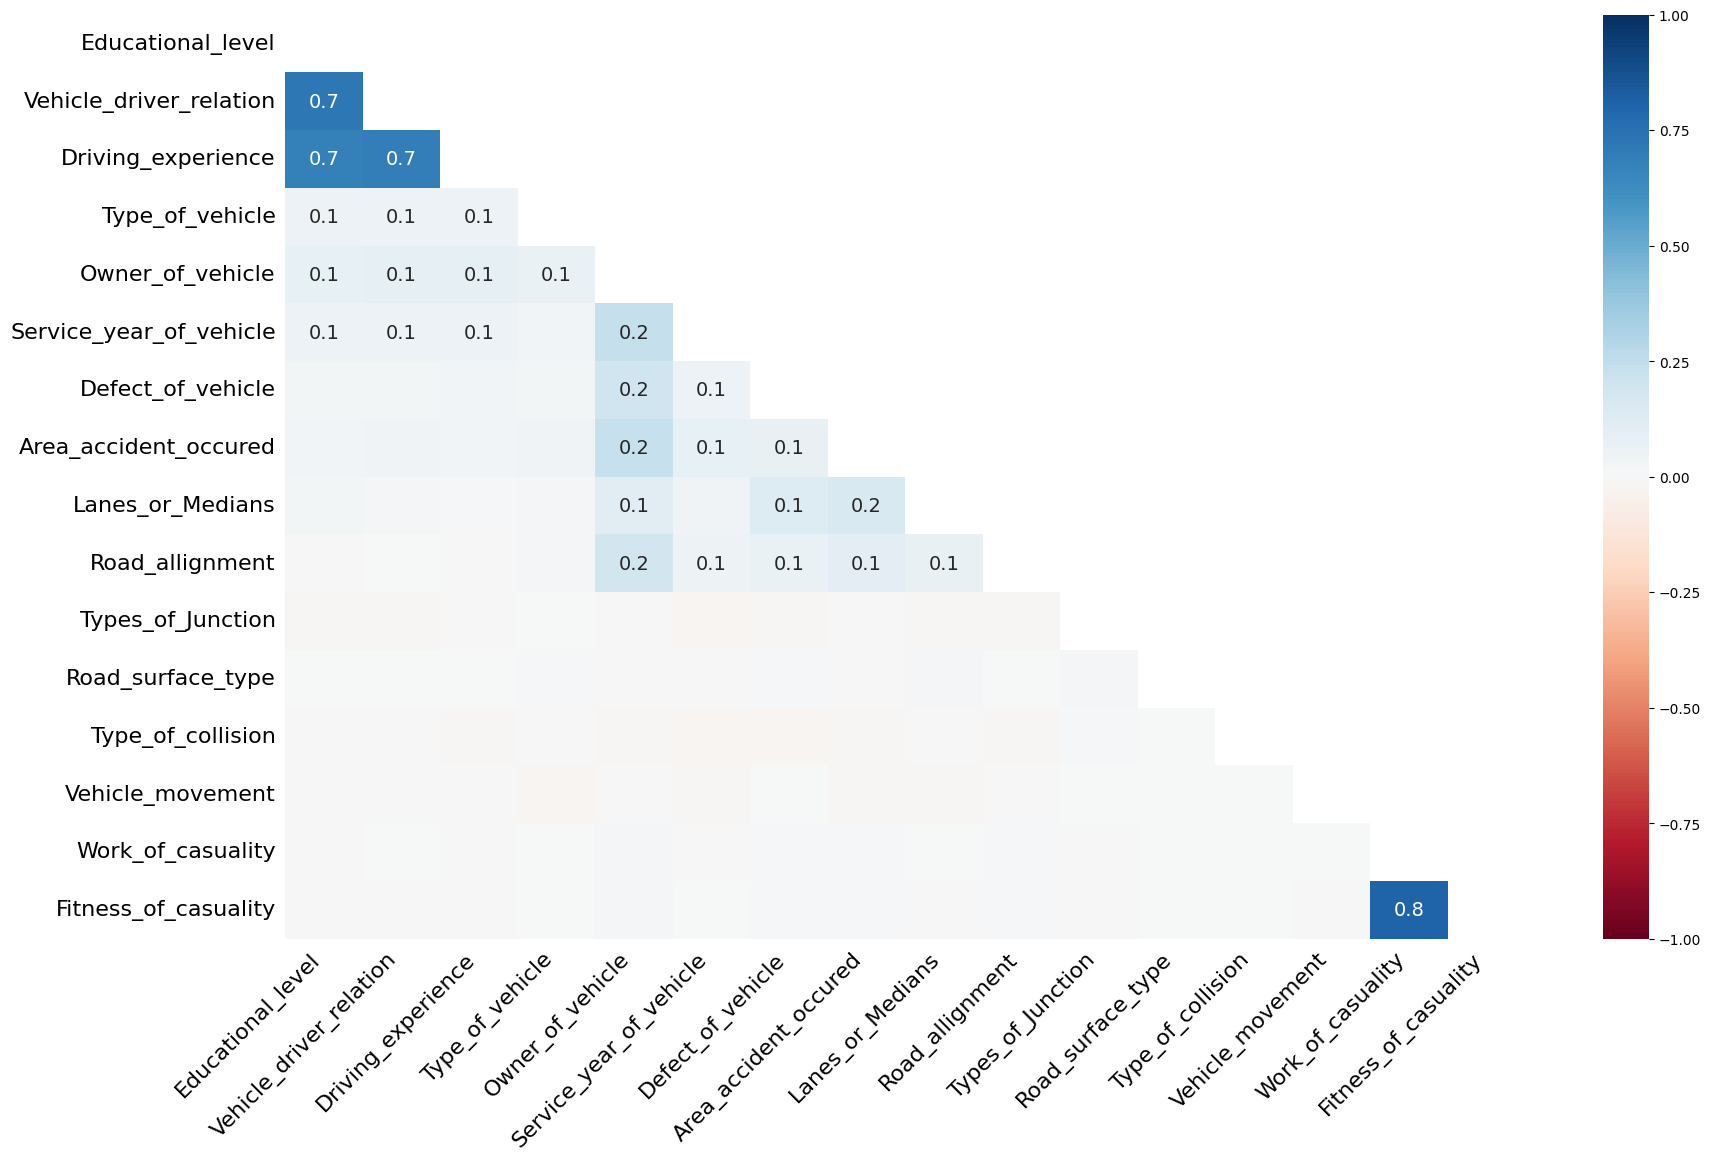

In [19]:
mssno.heatmap(df)

### Observations 
**1.Strong Positive Correlation Between Missing values of Different Features**

1. Driving Experience(4.70%) <-> Education Level (6.73 %)


For the Above mentioned columns there is a Strong Correlation Between Missing values of different feature which is a case of Missing Not at Random (MNAR),taking into consideration of less % of missing values can be dropped,the missing values from the column **Driving Experience** is dropped

**2.Weak Positive Correlation Between Missing values of Different Features**
1. Road_alignment (1.15 %) <-> Owner_of_vehicle(3.91%) <-> Service_year_of_vehicle(31.89%) <->  <-> Area_accident_occured (1.94%) <->Lanes_or_Medians(3.13%) 

For the Above mentioned columns there is a Weak Correlation Between Missing values of different feature which is a case of Missing Completely at Random(MCAR),taking into consideration of less % of missing values can be dropped,the missing values from the column **Road_alignment** is dropped


In [20]:
#dropping the unnecessary missing values
df.dropna(subset=['Road_allignment'],inplace=True,ignore_index=True)

In [21]:
#After Dropping the Number of missing values 
missing_values_table(df)

Your Dataset has 32 Number of Columns
15 Columns has missing values


,Missing Values,% of Missing Values
Educational_level,734,6.03
Vehicle_driver_relation,572,4.70
Driving_experience,820,6.74
Type_of_vehicle,933,7.66
Owner_of_vehicle,428,3.52
Service_year_of_vehicle,3852,31.64
Defect_of_vehicle,4334,35.60
Area_accident_occured,217,1.78
Lanes_or_Medians,363,2.98
Types_of_Junction,880,7.23


#### Filling the Rest of the missing values using SimpleImputer Method

In [22]:
df

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,17
2,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1
3,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,...,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury,1
4,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,NaN,No defect,...,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12169,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16
12170,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18
12171,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13
12172,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13


In [23]:
imputer=SimpleImputer(strategy='most_frequent')
df.iloc[:,:]=imputer.fit_transform(df)

In [24]:
#checking after filling the missing values
df.isnull().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_s

In [25]:
df.shape

(12174, 32)

By default, **".describe()"** method will show the statistical summary for numerical features only. 
If you want to have both together, pass the argument **"include='all'"** inside the ".describe()" method.
For getting the summary of categorical features, pass the argument **"include=[object]"** inside the ".describe()" method.

In [26]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties,Hour
count,12174.000000,12174.000000,12174.000000
mean,2.040907,1.548300,13.828980
std,0.688812,1.007533,5.199826
min,1.000000,1.000000,0.000000
25%,2.000000,1.000000,10.000000
50%,2.000000,1.000000,15.000000
75%,2.000000,2.000000,18.000000
max,7.000000,8.000000,23.000000


In [27]:
df.describe(include=[object])

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12174,12174,12174,12174,12174,12174,12174,12174,12174,12174,...,12174,12174,12174,12174,12174,12174,12174,12174,12174,12174
unique,7,5,3,7,4,7,17,4,6,3,...,13,4,3,6,4,7,5,9,20,3
top,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,2014,4217,11308,8272,10094,4144,4103,10817,6719,12062,...,8371,4895,5197,4385,7003,8995,12101,11261,2241,10297


In [28]:
df.sample(5)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
1161,Saturday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,...,Passenger,Female,18-30,3,Driver,Other,Not a Pedestrian,Changing lane to the right,Slight Injury,16
3965,Sunday,Under 18,Male,Junior high school,Employee,Below 1yr,Automobile,Owner,Unknown,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury,16
10663,Thursday,31-50,Male,Elementary school,Employee,5-10yr,Lorry (41?100Q),Owner,Unknown,No defect,...,Pedestrian,Male,5,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury,8
5563,Friday,18-30,Male,Above high school,Employee,Above 10yr,Public (12 seats),Owner,2-5yrs,No defect,...,Driver or rider,Female,18-30,2,Driver,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury,17
5341,Thursday,Unknown,Female,Junior high school,Employee,Above 10yr,Automobile,Owner,Unknown,No defect,...,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury,15


In [29]:
df.replace(to_replace="na",value="Not Applicable",inplace=True)

# Exploring Data Using Visualization

# Exploring Categorical Variables
### Bar Plots / Count plots

In [30]:
#Categorical columns
categorical_df=df.select_dtypes(include=[object])
categorical_df.columns[:-1]

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident'],
      dtype='object')

### Acidental Frequency by Category

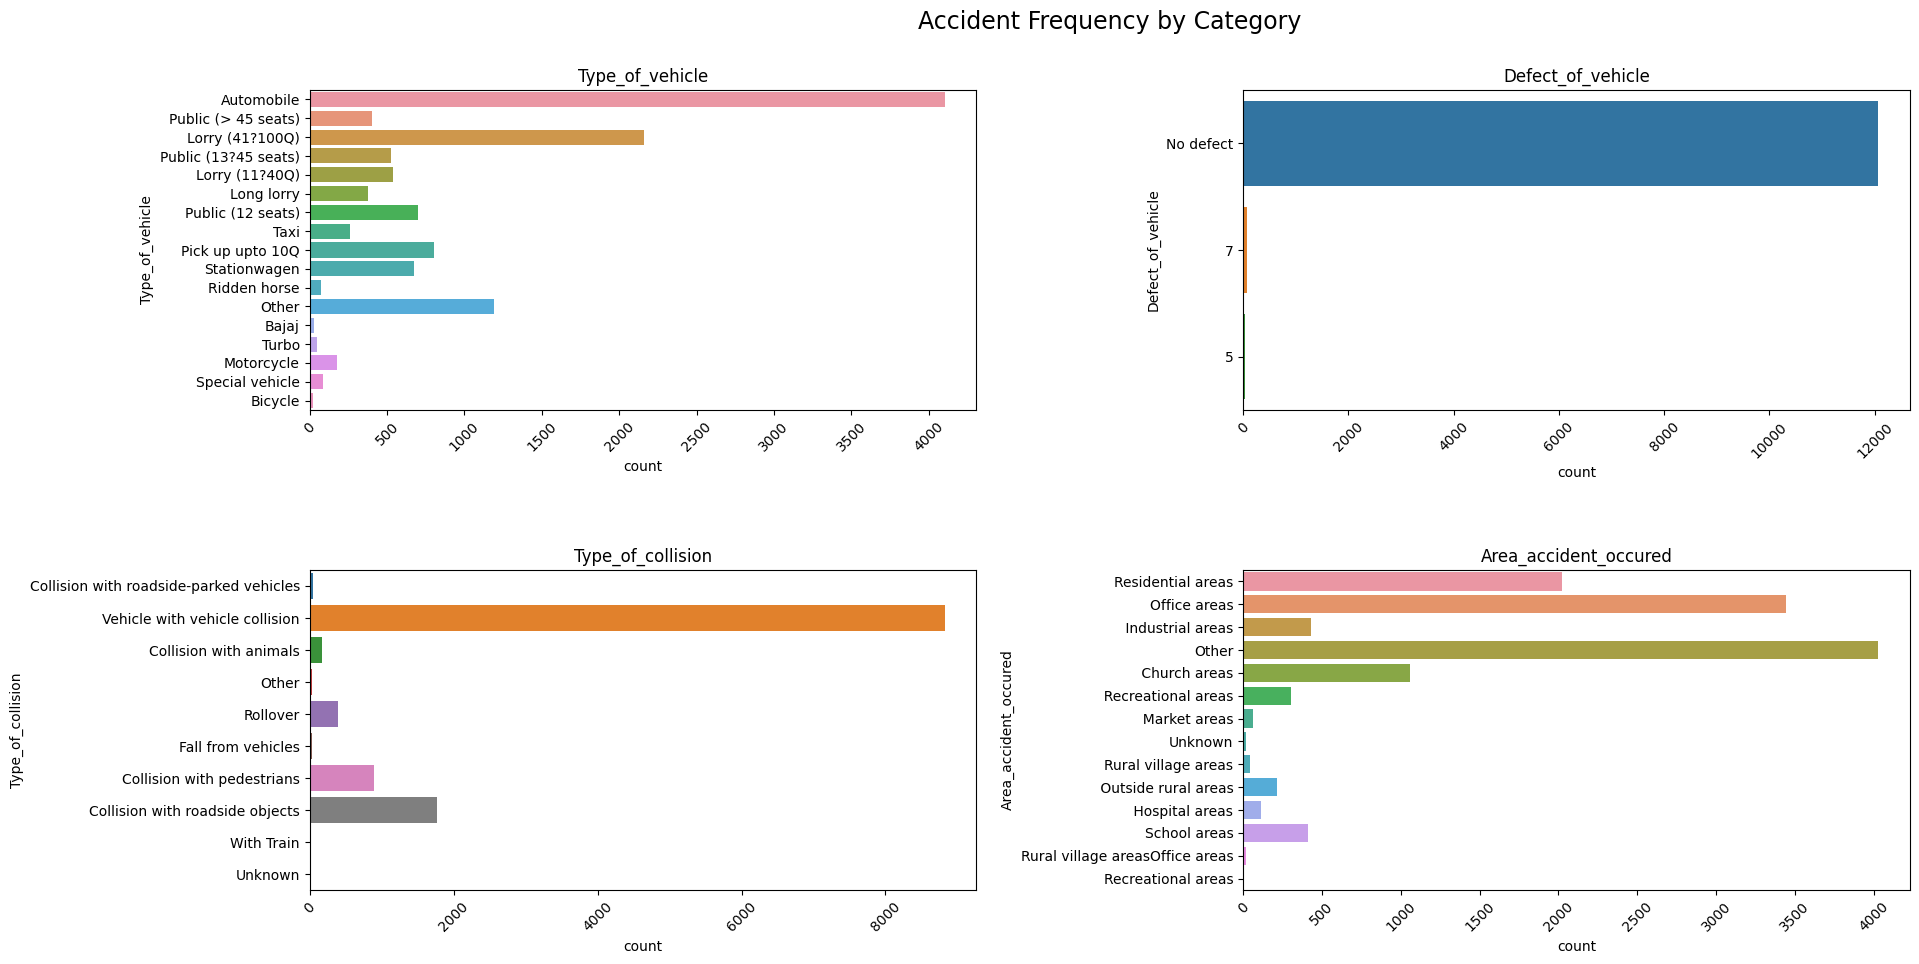

In [31]:
# Set the figure size and add a super title
plt.figure(figsize=(20, 10))
plt.suptitle("Accident Frequency by Category", fontsize=17)

# Define a function to create subplots
def subplot(df, i, column, order=None):
    plt.subplot(2, 2, i)  # Create a subplot grid with 2 rows and 3 columns
    plt.title(column)  # Set the title of the subplot
    if order:
        # If there's a specified order for the categories, use it
        sns.countplot(data=df,y=column,order=order)
    else:
        # Otherwise, create the count plot without a specific order
        sns.countplot(data=df,y=column)
    plt.xticks(rotation=45)


# Define the order for some categorical variables
age_order = ['Under 18', '18-30', '31-50', 'Over 51', 'Unknown']
day_order = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
education_order = ["Illiterate", "Writing & reading", "Elementary school", "Junior high school","High school","Above high school","Unknown"]

# Create subplots for different categorical variables
subplot(df, i=1, column='Type_of_vehicle')
subplot(df, i=2, column='Defect_of_vehicle')
subplot(df, i=3, column='Type_of_collision')
subplot(df, i=4, column='Area_accident_occured')


    # Adjust the layout of subplots
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.5)

# Show the plot
plt.show()



### Categorical Columns Over a Types of Acident Severity

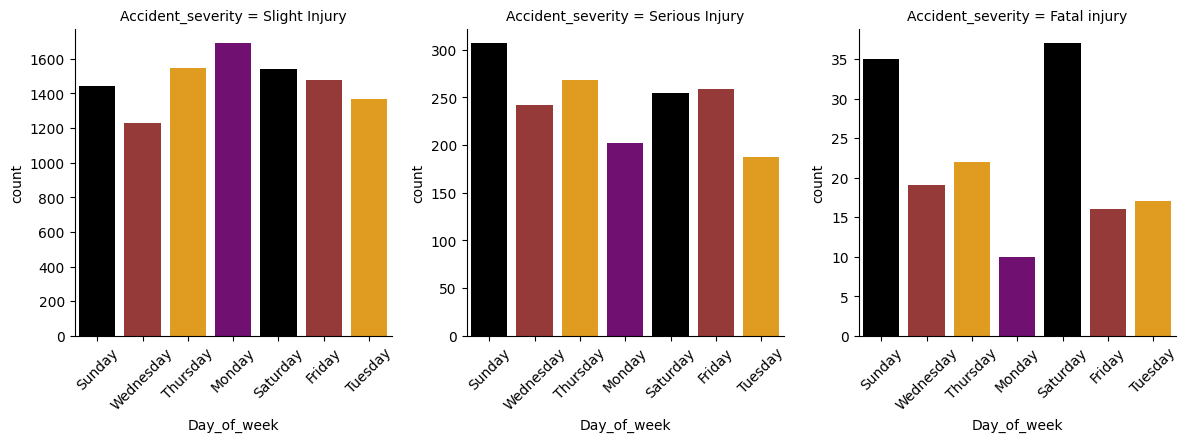

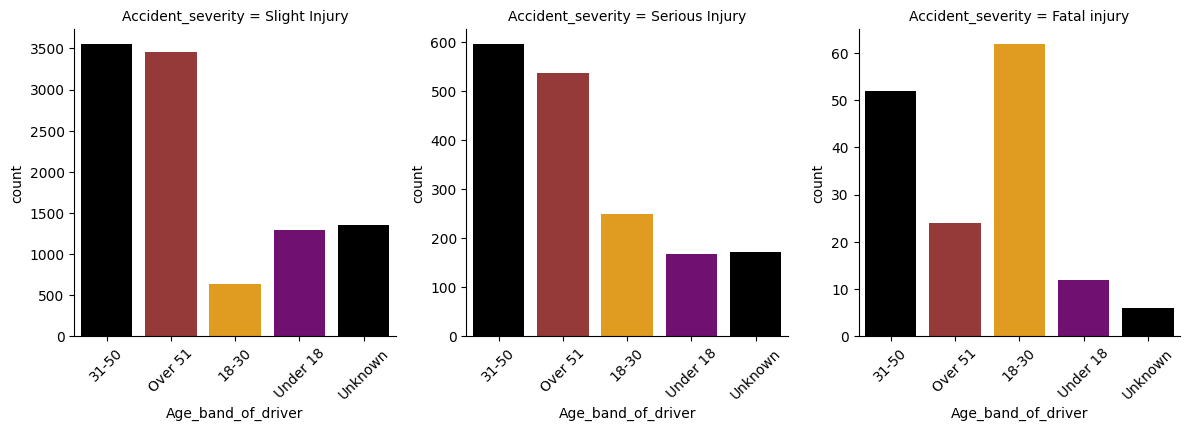

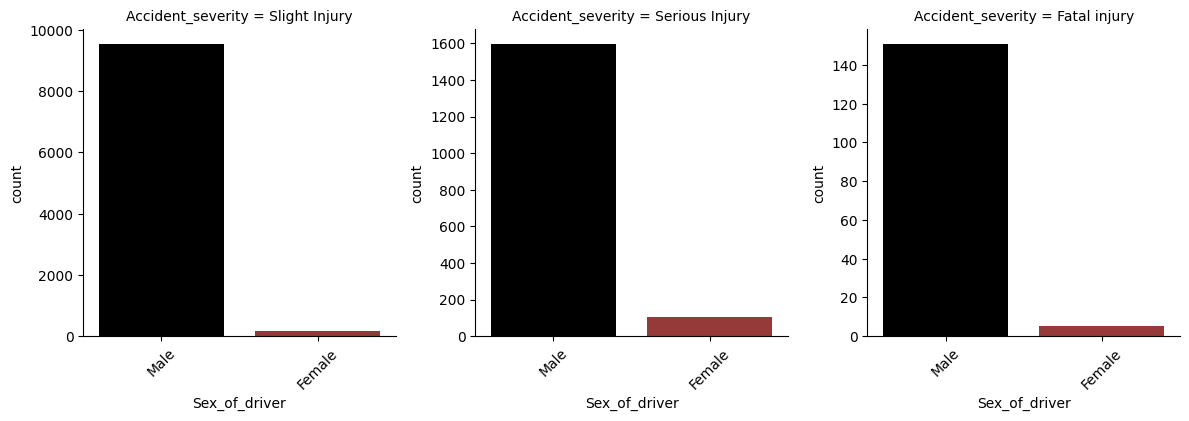

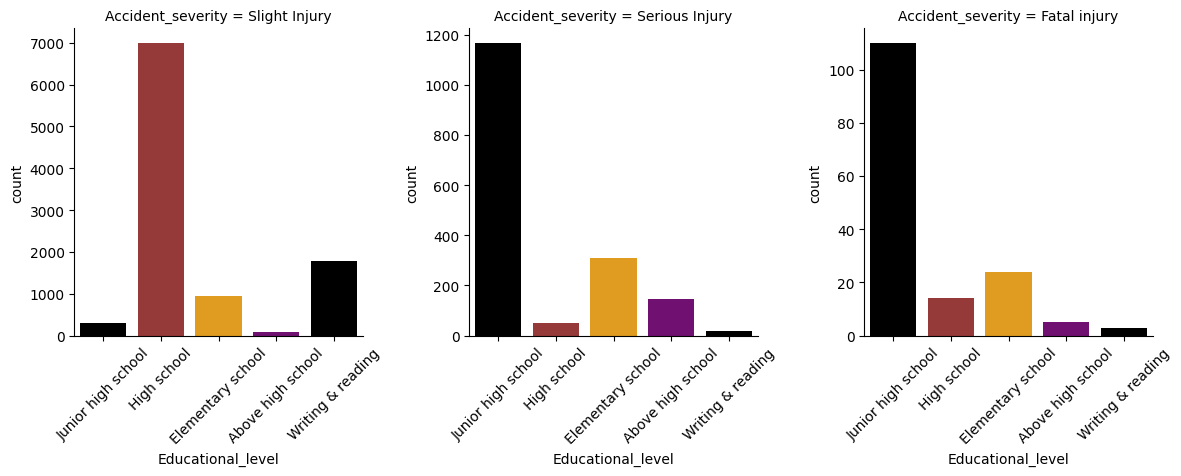

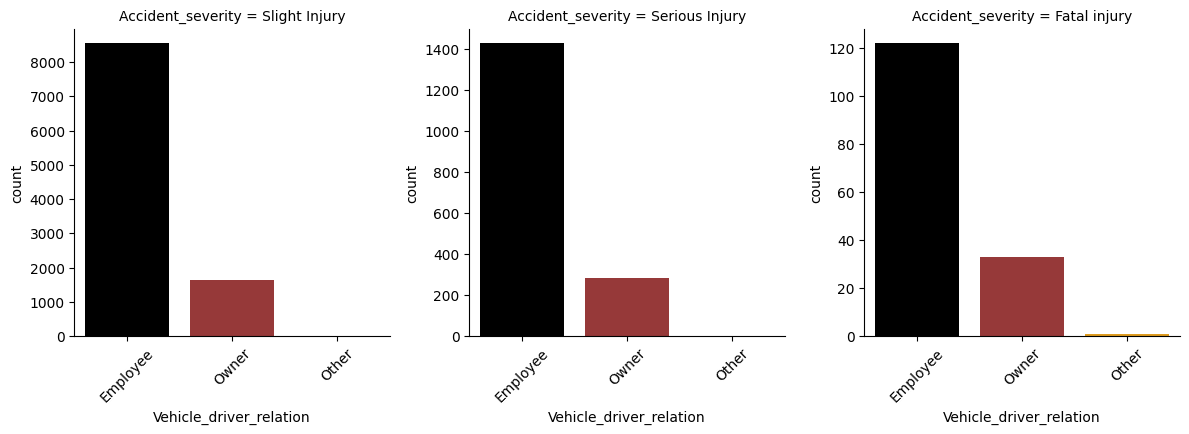

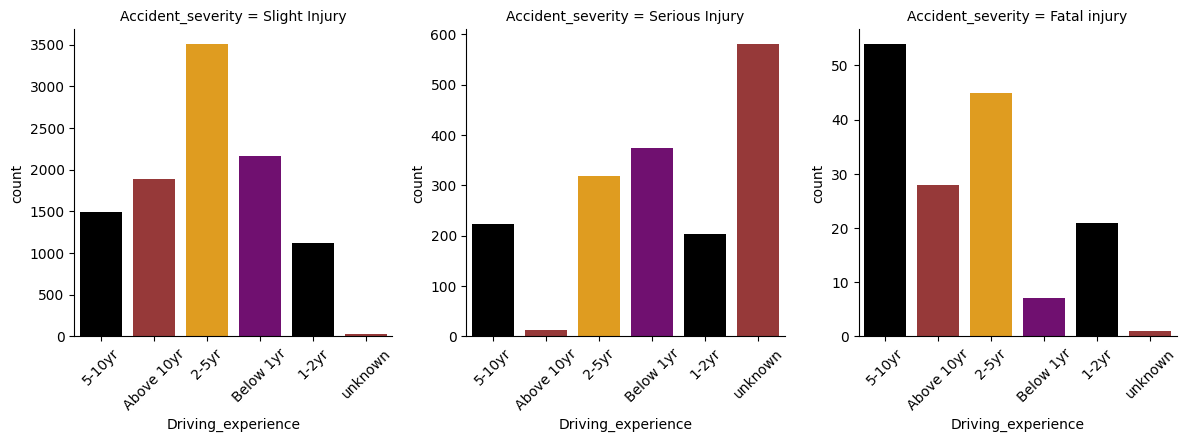

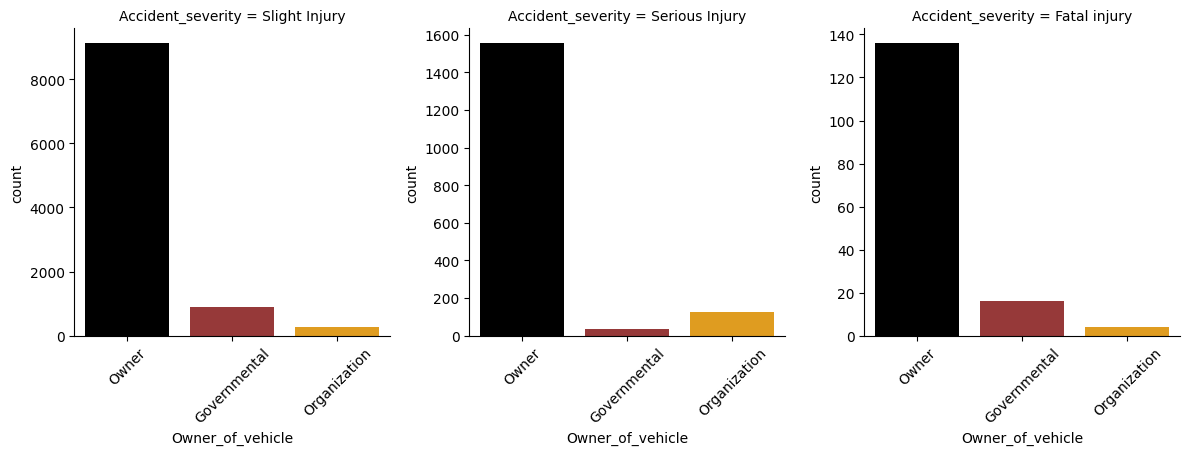

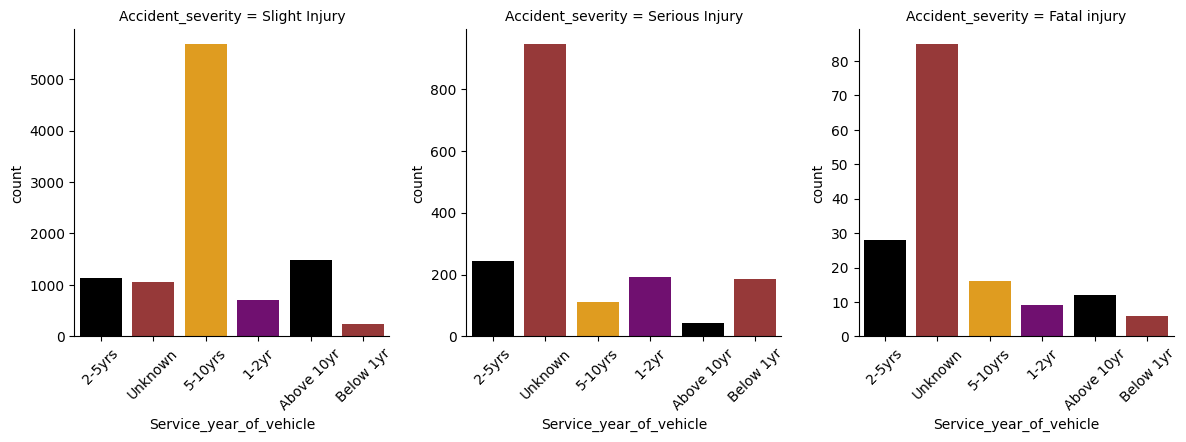

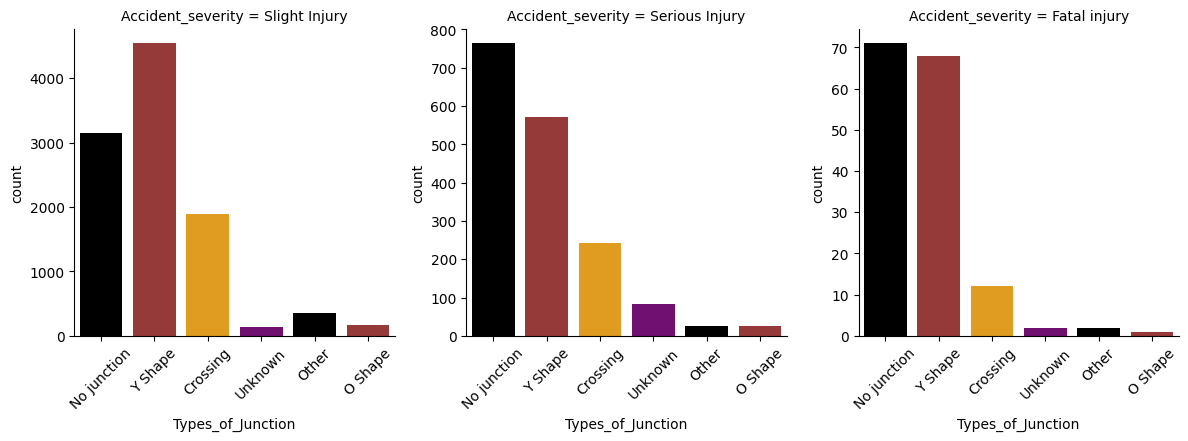

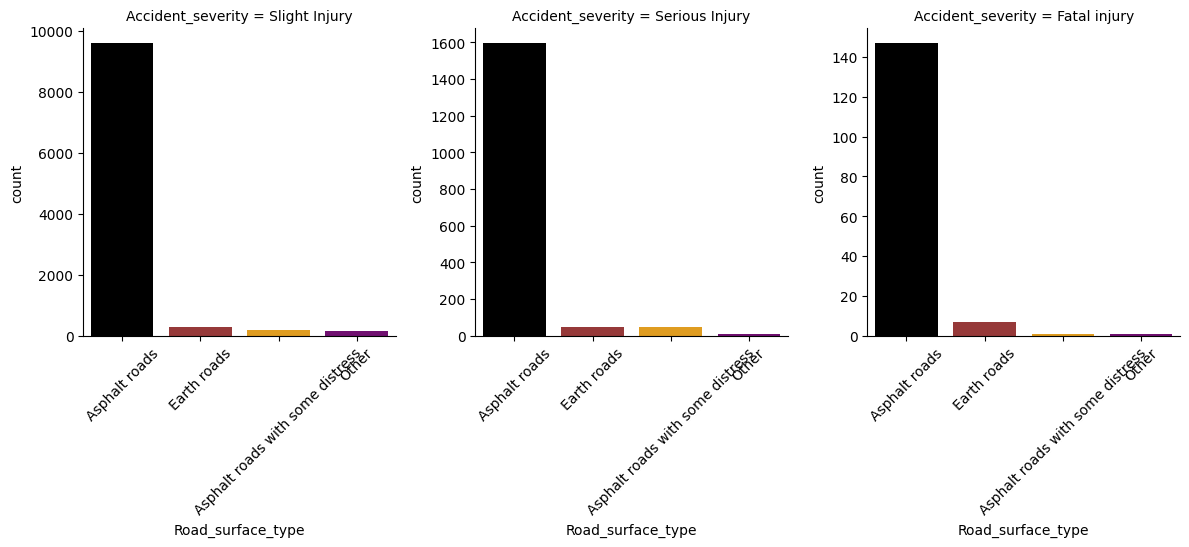

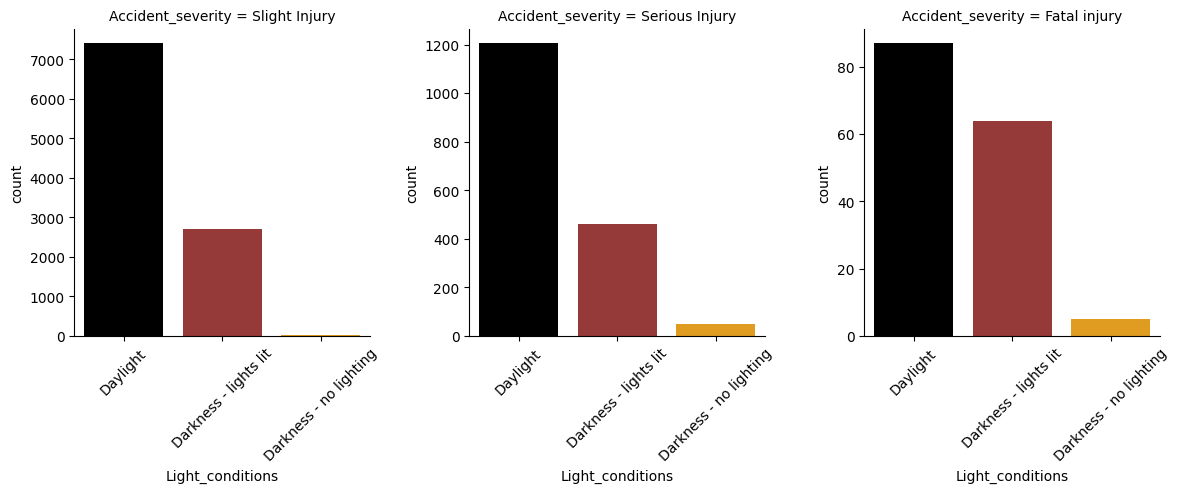

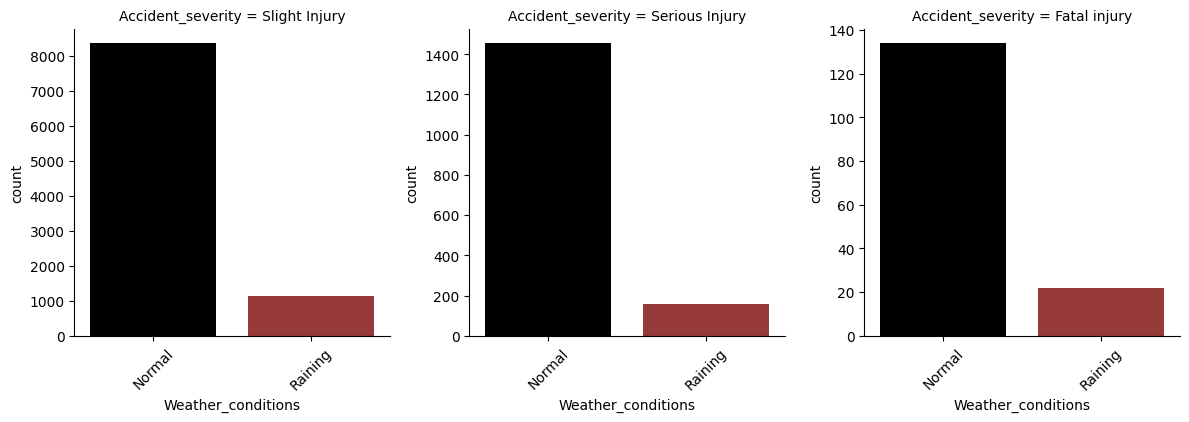

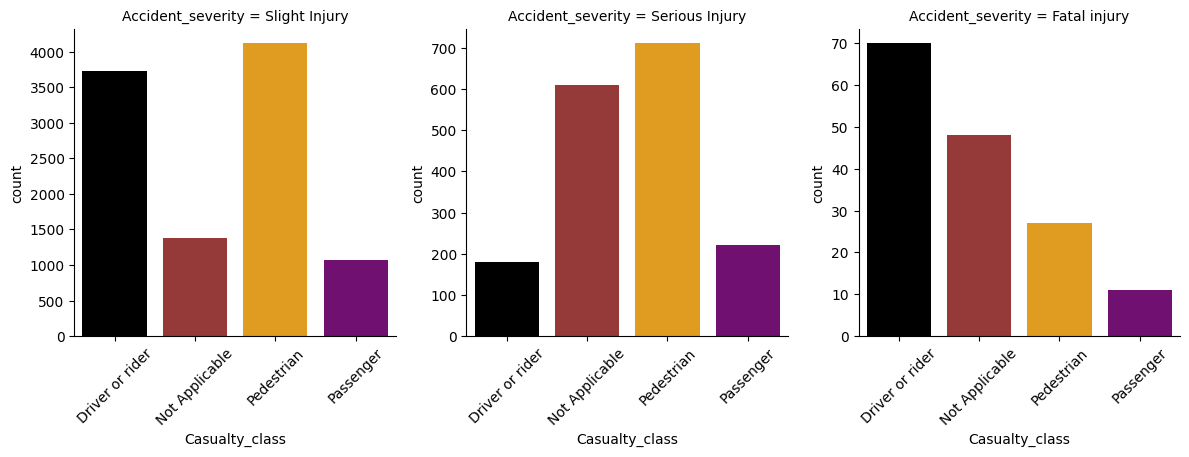

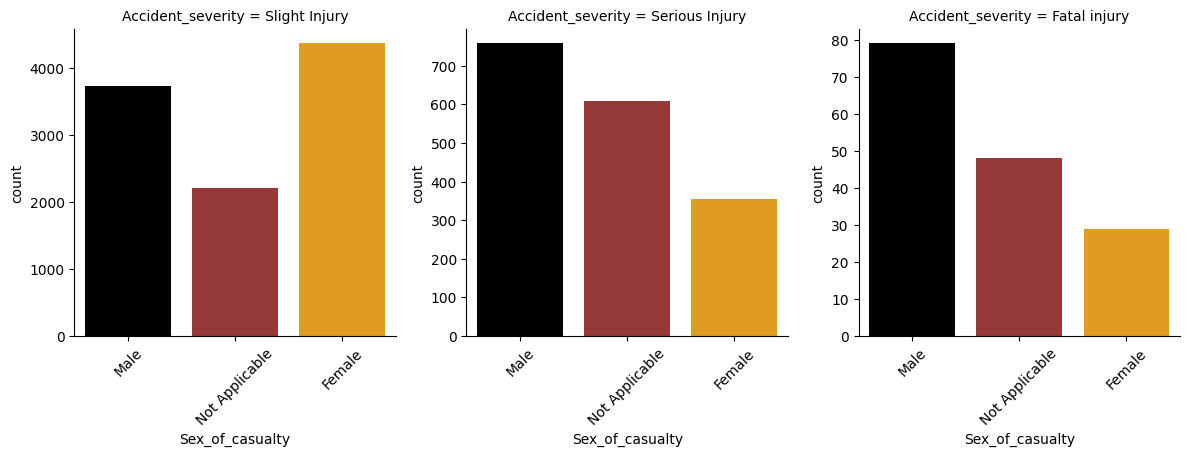

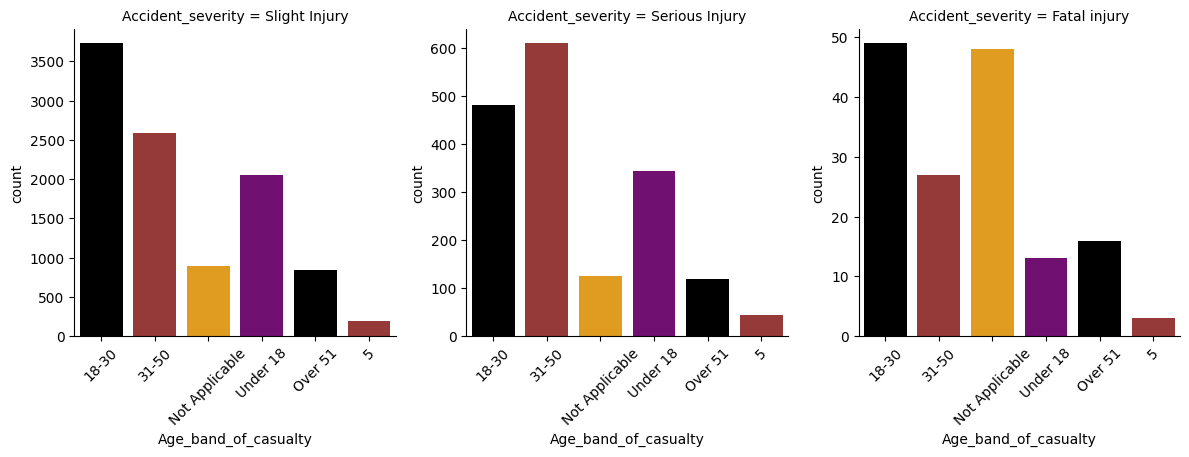

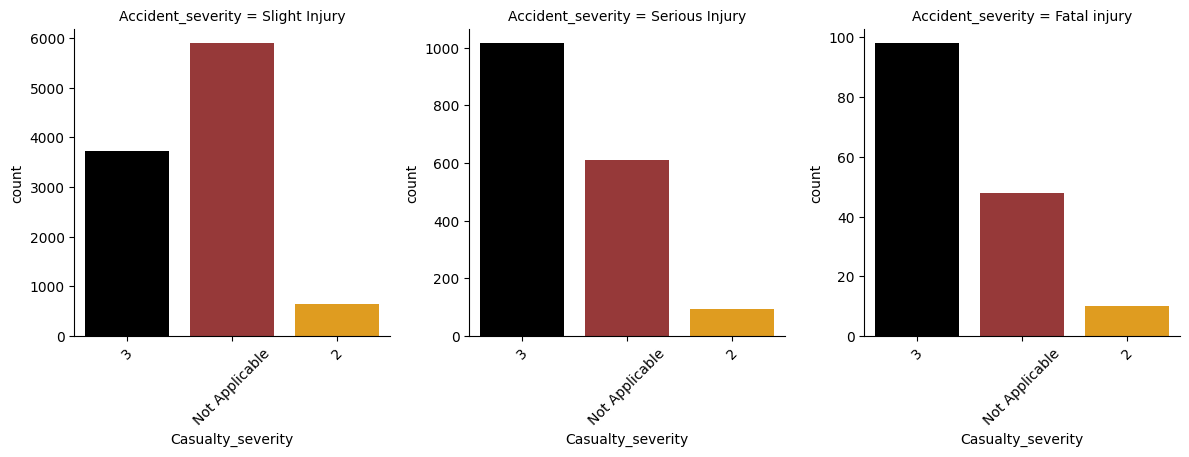

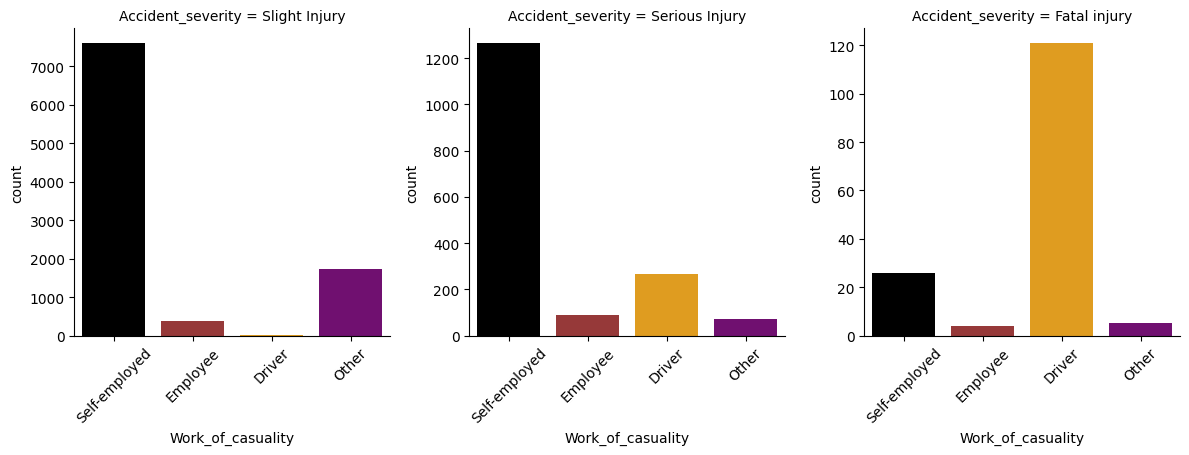

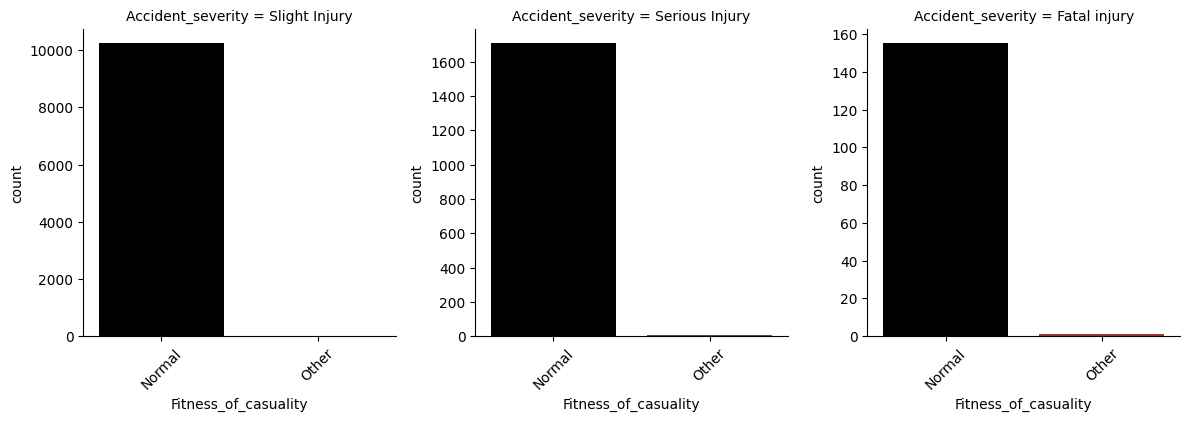

In [32]:

# List of categorical columns you want to create facet grids for
categorical_columns = ['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
        'Owner_of_vehicle', 'Service_year_of_vehicle', 'Types_of_Junction', 'Road_surface_type',
        'Light_conditions', 'Weather_conditions','Casualty_class','Sex_of_casualty', 
        'Age_band_of_casualty', 'Casualty_severity','Work_of_casuality', 'Fitness_of_casuality',]

# Loop through the categorical columns
for col in categorical_columns:
    # Create a facet grid for the current column
    grid = sns.FacetGrid(data=df, col="Accident_severity", height=4, aspect=1, sharey=False)
    
    # Map a countplot onto the grid
    grid.map(sns.countplot, col, palette=['black', 'brown', 'orange', 'purple'])
    
    # Set the x-axis labels rotation for better readability
    grid.set_xticklabels(rotation=45)
    
    # Show the plot
    plt.show()
plt.show()



### Exploring Numerical Features

## Types of Acident Severity over a Numerical Features
### Histogram

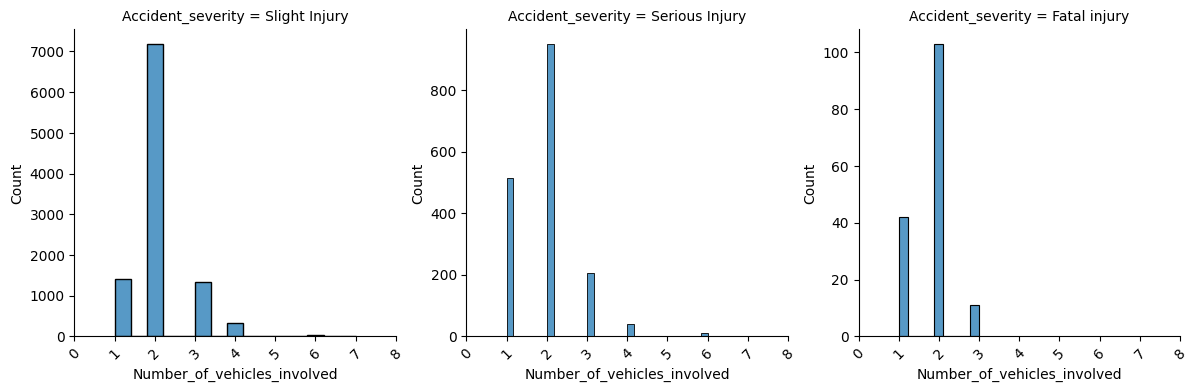

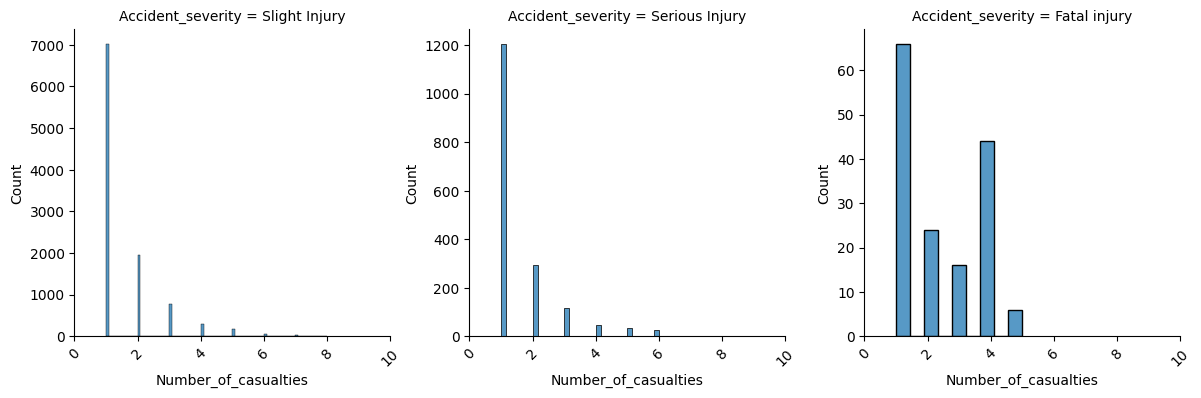

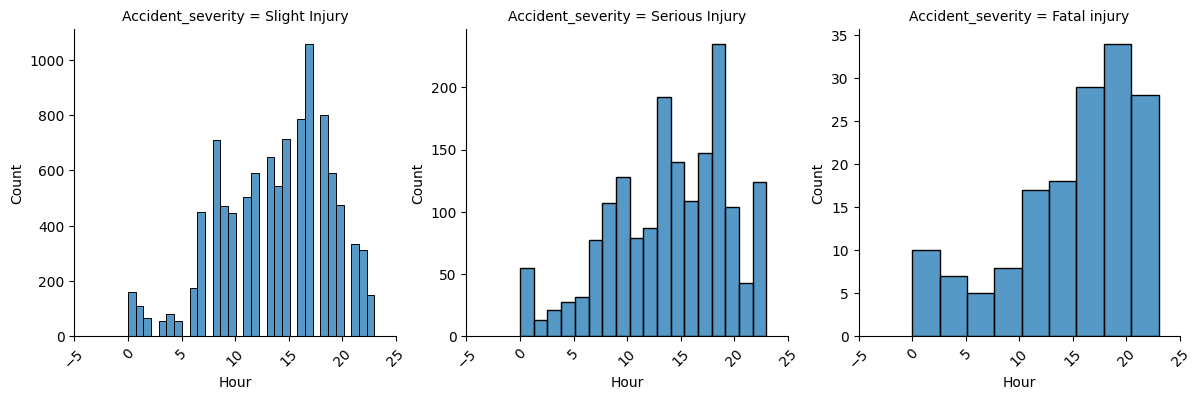

In [33]:
numerical_df=df.select_dtypes(include=[int])
numerical_df.columns

for col in numerical_df.columns:
    # Create a facet grid for the current column
    grid = sns.FacetGrid(data=df, col="Accident_severity", height=4, aspect=1, sharey=False)
    
    # Map a countplot onto the grid
    grid.map(sns.histplot, col)
    
    # Set the x-axis labels rotation for better readability
    grid.set_xticklabels(rotation=45)
    
    # Show the plot
    plt.show()

> # 2. Data preprocessing


In [34]:
# X - features
# y - target
X=df.drop(['Accident_severity'],axis=1)
y=df.iloc[:,-1]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12174 entries, 0 to 12173
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Day_of_week                  12174 non-null  object
 1   Age_band_of_driver           12174 non-null  object
 2   Sex_of_driver                12174 non-null  object
 3   Educational_level            12174 non-null  object
 4   Vehicle_driver_relation      12174 non-null  object
 5   Driving_experience           12174 non-null  object
 6   Type_of_vehicle              12174 non-null  object
 7   Owner_of_vehicle             12174 non-null  object
 8   Service_year_of_vehicle      12174 non-null  object
 9   Defect_of_vehicle            12174 non-null  object
 10  Area_accident_occured        12174 non-null  object
 11  Lanes_or_Medians             12174 non-null  object
 12  Road_allignment              12174 non-null  object
 13  Types_of_Junction            12

In [35]:
X

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Hour
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,...,Going straight,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Driver,Normal,Not a Pedestrian,Moving Backward,17
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,...,Going straight,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Driver,Normal,Not a Pedestrian,Overtaking,17
2,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,No defect,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,1
3,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,5-10yrs,No defect,...,Going straight,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Driver,Normal,Not a Pedestrian,Overtaking,1
4,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,Unknown,No defect,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12169,Wednesday,31-50,Male,Junior high school,Employee,2-5yr,Lorry (11?40Q),Owner,Unknown,No defect,...,Going straight,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Driver,Normal,Not a Pedestrian,No distancing,16
12170,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,Unknown,No defect,...,Other,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Driver,Normal,Not a Pedestrian,No distancing,18
12171,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,No defect,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,13
12172,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,No defect,...,Other,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,13


## 1.Feature Selection on Categorical Data 

> 1. **Chi-square Test**

The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently, and values should have an expected frequency greater than 5.

In [36]:
# before performing the chisquare we need to convert catergorical data into numerical data 
# we are using ordinal and label encoder -  for the sake of getting the numerical data

#Function to transform categorical features to numerical data type
def feature_conversion(X_train,X_test):
    X_train_cat=X_train.select_dtypes(include=object)
    X_test_cat=X_test.select_dtypes(include=object)
    oe_enc=OrdinalEncoder()
    X_train_enc=oe_enc.fit_transform(X_train_cat)
    X_test_enc=oe_enc.fit_transform(X_test_cat)
    return X_train_enc,X_test_enc

# function to transform target to numerical data type
def target_conversion(y_train,y_test):
    encoder=LabelEncoder()
    encoder.fit(y_train)
    y_train_enc=encoder.transform(y_train)
    y_test_enc=encoder.transform(y_test)
    return y_train_enc,y_test_enc

# function to return Best categorical features
def feature_selection(X_train,y_train,X_test):
    chi2_features=SelectKBest(score_func=chi2,k=10)
    chi2_features.fit(X_train,y_train)
    X_train_fs=chi2_features.transform(X_train)
    X_test_fs=chi2_features.transform(X_test)
    return X_train_fs,X_test_fs,chi2_features


In [37]:
#train-test spilt
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=1)

#feature Convertion
X_train_enc,X_test_enc=feature_conversion(X_train,X_test)

#target convertion
y_train_enc,y_test_enc=target_conversion(y_train,y_test)

#feature selection
X_train_best_fs,X_test_best_fs,fs = feature_selection(X_train_enc,y_train_enc,X_test_enc)

In [38]:
fs.get_feature_names_out()

array(['x0', 'x1', 'x4', 'x6', 'x8', 'x13', 'x14', 'x15', 'x16', 'x27'],
      dtype=object)

In [39]:
# function to get the column names of best features
def get_features_Names(fs,X_best,X):
    feature_names=fs.get_feature_names_out()
    best_features_names_list=[int(i[1:]) for i in feature_names]
    names=[]
    for i,j in enumerate(X.columns,start=0):
        if i in best_features_names_list:
            names.append(j)
    best_df=pd.DataFrame(X_best,columns=names)    
    return best_df.columns


In [40]:
X_cat=X_train.select_dtypes(include=object)
best_columns=get_features_Names(fs,X_train_best_fs,X_cat)
best_columns

Index(['Day_of_week', 'Age_band_of_driver', 'Vehicle_driver_relation',
       'Type_of_vehicle', 'Service_year_of_vehicle', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Cause_of_accident'],
      dtype='object')

In [41]:
# Features and target using in the next step
X_best=pd.concat([X[best_columns],df[df.select_dtypes(include=int).columns]],axis=1)
y=df['Accident_severity']

In [42]:
X_best.head()

,Day_of_week,Age_band_of_driver,Vehicle_driver_relation,Type_of_vehicle,Service_year_of_vehicle,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Cause_of_accident,Number_of_vehicles_involved,Number_of_casualties,Hour
0,Monday,18-30,Employee,Automobile,Above 10yr,No junction,Asphalt roads,Dry,Daylight,Moving Backward,2,2,17
1,Monday,31-50,Employee,Public (> 45 seats),5-10yrs,No junction,Asphalt roads,Dry,Daylight,Overtaking,2,2,17
2,Sunday,18-30,Employee,Public (> 45 seats),Unknown,Y Shape,Earth roads,Dry,Darkness - lights lit,Changing lane to the right,2,2,1
3,Sunday,18-30,Employee,Automobile,5-10yrs,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Overtaking,2,2,1
4,Wednesday,18-30,Employee,Automobile,Unknown,Crossing,Asphalt roads,Dry,Daylight,Other,1,1,17


> ### 2.Fetching the Top 10 Features with the help of Random_forest

In [43]:
X.select_dtypes(include=int)

,Number_of_vehicles_involved,Number_of_casualties,Hour
0,2,2,17
1,2,2,17
2,2,2,1
3,2,2,1
4,1,1,17
...,...,...,...
12169,2,1,16
12170,2,1,18
12171,1,1,13
12172,2,1,13


In [44]:
## Encoding the features
X_cat=X.select_dtypes(include=object)
X_num=X.select_dtypes(include=int)
oe=OrdinalEncoder()
encoded=oe.fit_transform(X_cat)
df_cat=pd.DataFrame(encoded,columns=X_cat.columns)
X_tr=pd.concat([X_num,df_cat],axis=1)
X_tr

,Number_of_vehicles_involved,Number_of_casualties,Hour,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,...,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
0,2,2,17,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,3.0,2.0,1.0,2.0,3.0,3.0,0.0,2.0,5.0,9.0
1,2,2,17,1.0,1.0,1.0,4.0,0.0,3.0,11.0,...,8.0,2.0,1.0,2.0,3.0,3.0,0.0,2.0,5.0,16.0
2,2,2,1,3.0,0.0,1.0,4.0,0.0,2.0,11.0,...,8.0,2.0,3.0,0.0,0.0,2.0,0.0,2.0,5.0,1.0
3,2,2,1,3.0,0.0,1.0,4.0,0.0,1.0,0.0,...,8.0,2.0,1.0,2.0,3.0,3.0,0.0,2.0,5.0,16.0
4,1,1,17,6.0,0.0,1.0,4.0,0.0,1.0,0.0,...,8.0,3.0,0.0,0.0,0.0,2.0,0.0,2.0,5.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12169,2,1,16,6.0,1.0,1.0,4.0,0.0,1.0,4.0,...,8.0,2.0,1.0,2.0,3.0,3.0,0.0,2.0,5.0,10.0
12170,2,1,18,3.0,4.0,1.0,1.0,0.0,2.0,0.0,...,8.0,4.0,1.0,2.0,3.0,3.0,0.0,2.0,5.0,10.0
12171,1,1,13,3.0,2.0,1.0,4.0,0.0,2.0,1.0,...,8.0,4.0,0.0,1.0,1.0,2.0,0.0,2.0,5.0,1.0
12172,2,1,13,3.0,0.0,0.0,4.0,0.0,3.0,5.0,...,8.0,4.0,1.0,2.0,3.0,3.0,0.0,2.0,5.0,5.0


In [45]:
le=LabelEncoder()
y=le.fit_transform(y)
y

array([2, 2, 2, ..., 1, 2, 2])

In [46]:
#train-test split
X_train1,X_test1,y_train1,y_test1=train_test_split(X_tr,y,test_size=0.3,random_state=19)

In [47]:
model=RandomForestClassifier(n_estimators=100,random_state=30,max_samples=0.5,
                          max_features=0.75,max_depth=15)
model.fit(X_train1,y_train1)

RandomForestClassifier(max_depth=15, max_features=0.75, max_samples=0.5,
                       random_state=30)

In [48]:
y_pred=model.predict(X_test1)
accuracy_score(y_test1,y_pred)

0.8450588557350123

In [49]:
model.feature_importances_

array([0.05293826, 0.03944789, 0.09564083, 0.05771313, 0.03901027,
       0.00999188, 0.03459768, 0.0146362 , 0.04489381, 0.06103965,
       0.01139565, 0.03457079, 0.00368742, 0.04989288, 0.03844733,
       0.02794019, 0.03606877, 0.01362873, 0.01411691, 0.01971373,
       0.02397097, 0.03276043, 0.04356183, 0.02129394, 0.01714605,
       0.03288739, 0.01408712, 0.02463456, 0.00392097, 0.01573306,
       0.0706317 ])

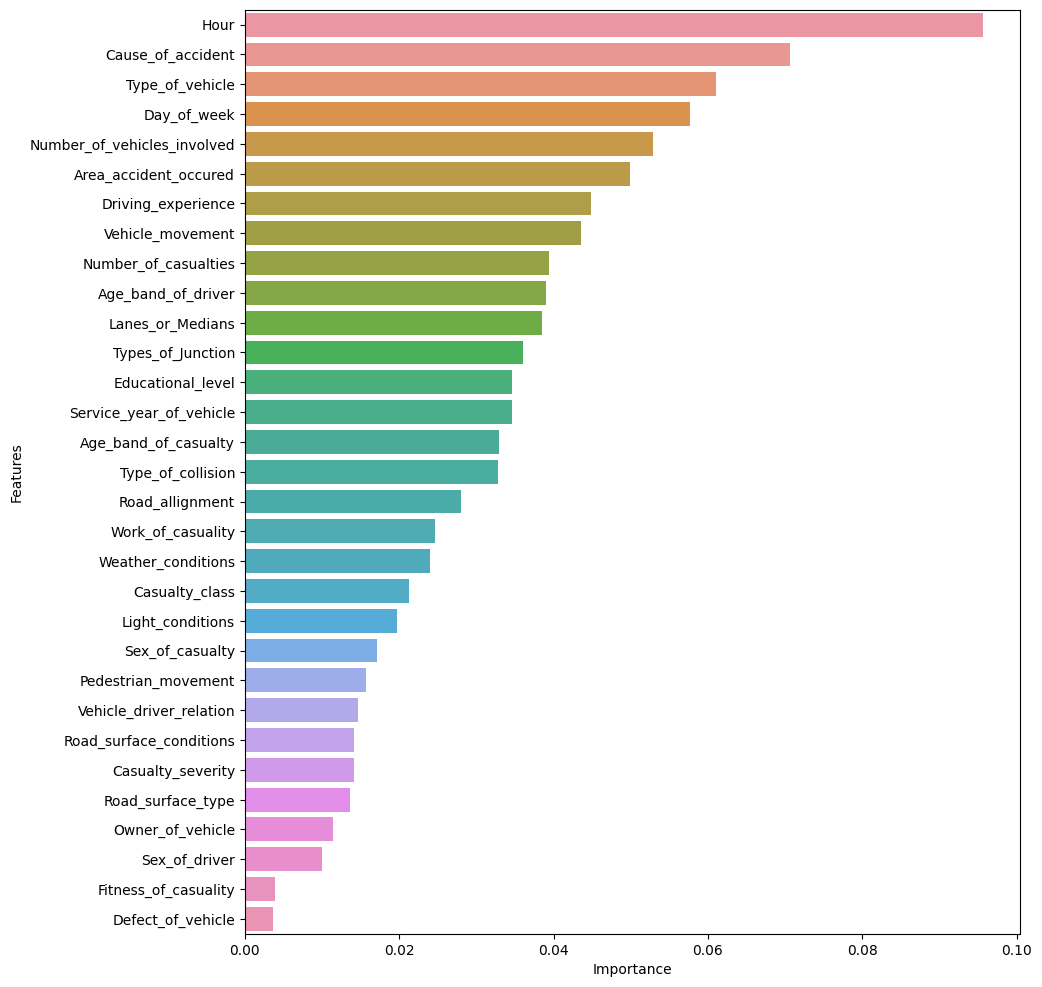

In [50]:
df_importance = pd.DataFrame()
df_importance['Features']= X_tr.columns
df_importance['Importance'] = model.feature_importances_
plt.figure(figsize=(10, 12))
sns.barplot(data = df_importance.sort_values("Importance", ascending=False), y='Features', x='Importance');

In [51]:
# selecting top 10 features
top10 = list(df_importance.sort_values("Importance", ascending=False)['Features'].head(10).values)
top10

['Hour',
 'Cause_of_accident',
 'Type_of_vehicle',
 'Day_of_week',
 'Number_of_vehicles_involved',
 'Area_accident_occured',
 'Driving_experience',
 'Vehicle_movement',
 'Number_of_casualties',
 'Age_band_of_driver']

In [52]:
best_columns

Index(['Day_of_week', 'Age_band_of_driver', 'Vehicle_driver_relation',
       'Type_of_vehicle', 'Service_year_of_vehicle', 'Types_of_Junction',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Cause_of_accident'],
      dtype='object')

### observations :
Based on the two methods of feature selection finally choosing these 10 columns for further analysis
**'Hour'
'Day_of_week'
"Age_band_of_driver"
"Area_accident_occured"
"Type_of_vehicle"
"Types_of_Junction"
"Driving_experience"
"Road_surface_type"
"Road_surface_conditions"
"Light_conditions" "Number_of_vehicles_involved","Number_of_casualties"**


In [53]:
X_best_feats=X_tr[['Day_of_week',"Age_band_of_driver","Area_accident_occured","Type_of_vehicle",
                   "Types_of_Junction","Driving_experience","Road_surface_type","Road_surface_conditions",
                   "Light_conditions","Number_of_vehicles_involved","Number_of_casualties",'Hour']]

In [54]:
X_best_feats

,Day_of_week,Age_band_of_driver,Area_accident_occured,Type_of_vehicle,Types_of_Junction,Driving_experience,Road_surface_type,Road_surface_conditions,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Hour
0,1.0,0.0,9.0,0.0,1.0,0.0,0.0,0.0,3.0,2,2,17
1,1.0,1.0,6.0,11.0,1.0,3.0,0.0,0.0,3.0,2,2,17
2,3.0,0.0,6.0,11.0,7.0,2.0,2.0,0.0,0.0,2,2,1
3,3.0,0.0,4.0,0.0,7.0,1.0,0.0,0.0,0.0,2,2,1
4,6.0,0.0,9.0,0.0,0.0,1.0,0.0,0.0,3.0,1,1,17
...,...,...,...,...,...,...,...,...,...,...,...,...
12169,6.0,1.0,5.0,4.0,1.0,1.0,0.0,0.0,3.0,2,1,16
12170,3.0,4.0,5.0,0.0,1.0,2.0,0.0,0.0,3.0,2,1,18
12171,3.0,2.0,5.0,1.0,1.0,2.0,0.0,0.0,3.0,1,1,13
12172,3.0,0.0,6.0,5.0,1.0,3.0,0.0,0.0,0.0,2,1,13


In [55]:
y=df['Accident_severity']

**Data is imbalanced we need to Balance the data **

In [56]:
#train-test Split
X_train,X_test,y_train,y_test=train_test_split(X_best_feats,y,test_size=0.3,random_state=99)

### Handling Imbalanced data

In [57]:
over_sample=SMOTE()

#handling imbalanced data of training  and test dataset

X_train_resampled,y_train_resampled=over_sample.fit_resample(X_train,y_train)

X_test_resampled,y_test_resampled=over_sample.fit_resample(X_test,y_test)

In [58]:
X_train_resampled

,Day_of_week,Age_band_of_driver,Area_accident_occured,Type_of_vehicle,Types_of_Junction,Driving_experience,Road_surface_type,Road_surface_conditions,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Hour
0,0.000000,2.000000,6.000000,7.000000,0.000000,3.000000,0.0,0.00000,0.000000,2,2,20
1,4.000000,0.000000,2.000000,5.000000,0.000000,1.000000,0.0,0.00000,0.000000,2,2,0
2,3.000000,4.000000,6.000000,0.000000,1.000000,1.000000,0.0,0.00000,0.000000,2,1,23
3,1.000000,0.000000,7.000000,14.000000,7.000000,3.000000,0.0,3.00000,3.000000,2,1,12
4,5.000000,2.000000,7.000000,3.000000,1.000000,2.000000,3.0,0.00000,3.000000,2,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...
21664,0.156786,0.843214,6.000000,0.000000,7.000000,1.843214,0.0,0.00000,3.000000,1,1,8
21665,1.945022,0.351659,1.296681,5.000000,1.000000,1.648341,0.0,0.00000,0.000000,2,1,19
21666,0.475037,1.524963,6.475037,0.000000,1.000000,2.524963,0.0,1.57489,3.000000,1,1,15
21667,0.000000,0.000000,9.000000,9.000000,7.000000,1.000000,0.0,0.00000,2.158387,2,1,22


In [59]:
# train data is balanced
pd.DataFrame(y_train_resampled).shape

(21669, 1)

In [60]:
## test Data is balanced
pd.DataFrame(y_test_resampled).shape

(9222, 1)

# Model Creation and Model Evaluation


In [61]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)))

In [62]:
names = []
results = []
for name, model in models:
    fold = KFold(n_splits=10)
    score = cross_val_score(model, X_train_resampled, y_train_resampled, cv=fold, scoring='accuracy')
    names.append(name)
    results.append(score)

In [63]:
plotdict = dict(zip(names, results))

for k,v in plotdict.items():
    print(f"{k}: {round(v.mean(),5)}")

Logistic Regression: 0.3438
Decision: 0.87249
RandomForest: 0.91204


### Logistic Regression


In [64]:
lr_model=LogisticRegression(multi_class='multinomial',solver='lbfgs', random_state=35)

In [65]:
lr_model.fit(X_train_resampled,y_train_resampled)

LogisticRegression(multi_class='multinomial', random_state=35)

In [66]:
y_pred=lr_model.predict(X_test_resampled)
accuracy_score(y_test_resampled,y_pred)

0.4881804380828454

### Decision Tree Classifier

In [67]:
dt=DecisionTreeClassifier()

In [68]:
dt.fit(X_train_resampled,y_train_resampled)
## Testing data Accuracy and F1-score
y_pred_dt=dt.predict(X_test_resampled)
print("TESTING DATA ACCURACY")
print("Accuracy Score of testing data-",accuracy_score(y_test_resampled,y_pred_dt))
print("F1 score of testing data-",f1_score(y_test_resampled,y_pred_dt,average='weighted'))

print()
y_pred_dt_tr=dt.predict(X_train_resampled)
print("TRAINING DATA ACCURACY")
print("Accuracy Score of training data -",accuracy_score(y_train_resampled,y_pred_dt_tr))
print("F1 score of training data -",f1_score(y_train_resampled,y_pred_dt_tr,average='weighted'))

TESTING DATA ACCURACY
Accuracy Score of testing data- 0.5620255909780959
F1 score of testing data- 0.5378509492208664

TRAINING DATA ACCURACY
Accuracy Score of training data - 0.9998615533711754
F1 score of training data - 0.999861553370512


In [69]:
rf=RandomForestClassifier(n_estimators=100,random_state=36,max_samples=0.5,
                          max_features=0.75,max_depth=15)

In [70]:
rf.fit(X_train_resampled,y_train_resampled)
## Testing data Accuracy and F1-score
y_pred_rf=rf.predict(X_test_resampled)
print("TESTING DATA ACCURACY")
print("Accuracy Score of testing data-",accuracy_score(y_test_resampled,y_pred_rf))
print("F1 score of testing data-",f1_score(y_test_resampled,y_pred_rf,average='weighted'))

print()
y_pred_rf_tr=rf.predict(X_train_resampled)
print("TRAINING DATA ACCURACY")
print("Accuracy Score of training data -",accuracy_score(y_train_resampled,y_pred_rf_tr))
print("F1 score of training data -",f1_score(y_train_resampled,y_pred_rf_tr,average='weighted'))

TESTING DATA ACCURACY
Accuracy Score of testing data- 0.6460637605725439
F1 score of testing data- 0.6207030367950733

TRAINING DATA ACCURACY
Accuracy Score of training data - 0.9639115787530573
F1 score of training data - 0.9638043141519808


In [71]:
print(classification_report(y_test_resampled,y_pred_rf))

                precision    recall  f1-score   support

  Fatal injury       0.83      0.30      0.44      3074
Serious Injury       0.50      0.71      0.59      3074
 Slight Injury       0.76      0.93      0.83      3074

      accuracy                           0.65      9222
     macro avg       0.70      0.65      0.62      9222
  weighted avg       0.70      0.65      0.62      9222



### observations 
Looks like model is overfitted, making use of the hyperparameter tunning in order to improve the training accuracy

In [72]:
model_rf=RandomForestClassifier(random_state=67,n_jobs=-1)
params={
    'max_depth':[2,3,5,10,20],
    'min_samples_leaf':[5,10,20,50,100,200],
    'n_estimators':[50,100,150,200]
}

In [73]:
grid_cv=GridSearchCV(estimator=model_rf,param_grid=params,cv=5,n_jobs=-1,verbose=1,scoring='accuracy')
grid_cv.fit(X_train_resampled,y_train_resampled)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=67),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy', verbose=1)

In [74]:
grid_cv.best_score_

0.9185026195440897

In [75]:
rf_final=grid_cv.best_estimator_
rf_final

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=150,
                       n_jobs=-1, random_state=67)

### After hyperparamter Tunning

In [76]:
rf_final.fit(X_train_resampled,y_train_resampled)
## Testing data Accuracy and F1-score
y_pred_rf=rf_final.predict(X_test_resampled)
print("TESTING DATA ACCURACY")
print("Accuracy Score of testing data-",accuracy_score(y_test_resampled,y_pred_rf))
print("F1 score of testing data-",f1_score(y_test_resampled,y_pred_rf,average='weighted'))

print()
y_pred_rf_tr=rf_final.predict(X_train_resampled)
print("TRAINING DATA ACCURACY")
print("Accuracy Score of training data -",accuracy_score(y_train_resampled,y_pred_rf_tr))
print("F1 score of training data -",f1_score(y_train_resampled,y_pred_rf_tr,average='weighted'))

TESTING DATA ACCURACY
Accuracy Score of testing data- 0.670895684233355
F1 score of testing data- 0.654733332007319

TRAINING DATA ACCURACY
Accuracy Score of training data - 0.9580506714661498
F1 score of training data - 0.9580163246776233


### Model saving 

In [77]:
X_train_resampled

,Day_of_week,Age_band_of_driver,Area_accident_occured,Type_of_vehicle,Types_of_Junction,Driving_experience,Road_surface_type,Road_surface_conditions,Light_conditions,Number_of_vehicles_involved,Number_of_casualties,Hour
0,0.000000,2.000000,6.000000,7.000000,0.000000,3.000000,0.0,0.00000,0.000000,2,2,20
1,4.000000,0.000000,2.000000,5.000000,0.000000,1.000000,0.0,0.00000,0.000000,2,2,0
2,3.000000,4.000000,6.000000,0.000000,1.000000,1.000000,0.0,0.00000,0.000000,2,1,23
3,1.000000,0.000000,7.000000,14.000000,7.000000,3.000000,0.0,3.00000,3.000000,2,1,12
4,5.000000,2.000000,7.000000,3.000000,1.000000,2.000000,3.0,0.00000,3.000000,2,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...
21664,0.156786,0.843214,6.000000,0.000000,7.000000,1.843214,0.0,0.00000,3.000000,1,1,8
21665,1.945022,0.351659,1.296681,5.000000,1.000000,1.648341,0.0,0.00000,0.000000,2,1,19
21666,0.475037,1.524963,6.475037,0.000000,1.000000,2.524963,0.0,1.57489,3.000000,1,1,15
21667,0.000000,0.000000,9.000000,9.000000,7.000000,1.000000,0.0,0.00000,2.158387,2,1,22


In [78]:
import joblib

In [87]:
# ## Machine Learning Model Saving
joblib.dump(rf_final,'RF_model.joblib')

['RF_model.joblib']

In [80]:
rf_final.feature_names_in_

array(['Day_of_week', 'Age_band_of_driver', 'Area_accident_occured',
       'Type_of_vehicle', 'Types_of_Junction', 'Driving_experience',
       'Road_surface_type', 'Road_surface_conditions', 'Light_conditions',
       'Number_of_vehicles_involved', 'Number_of_casualties', 'Hour'],
      dtype=object)